In [2]:
from skimage.io import imread
path_=r"D:\images\tnia-python-images\deconvolution\bead"

bead=imread(path_+"/Bead.tif")
psf=imread(path_+"/PSF-Bead.tif")

In [1]:
bead.max()

NameError: name 'bead' is not defined

sdeconv 1.x.x detected


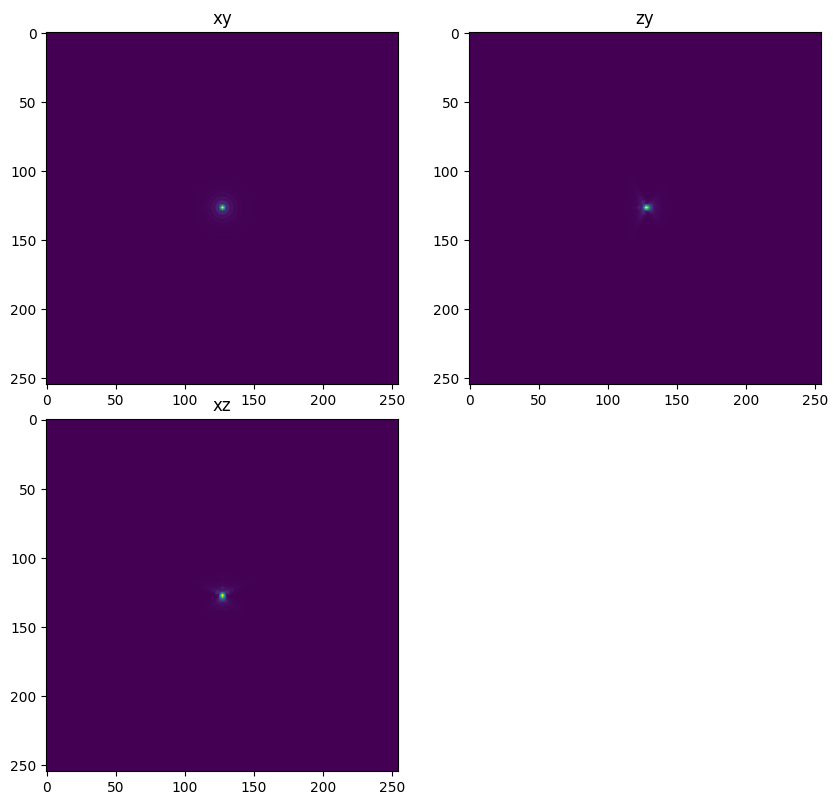

In [8]:
from tnia.nd.ndutil import centercrop
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max

use_provided_psf=False

if use_provided_psf==True:
    psf=centercrop(psf, (101,65,65))
else:
    ni=1.518
    ns=1.5
    NA=1.4
    w=0.530

    xy_spacing = 0.0645
    z_spacing=.16

    xy_psf_dim=255
    z_psf_dim=551

    d=128*z_spacing

    psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_psf_dim, d, w)
    psf = psf.astype('float32')

    from tnia.deconvolution.psfs import recenter_psf_axial

    psf=recenter_psf_axial(psf, 255)
fig=show_xyz_max(psf)

In [6]:
import numpy as np
roi=np.s_[50:150, :, :]
#bead=bead[roi]
bead=bead[::-1,:,:]

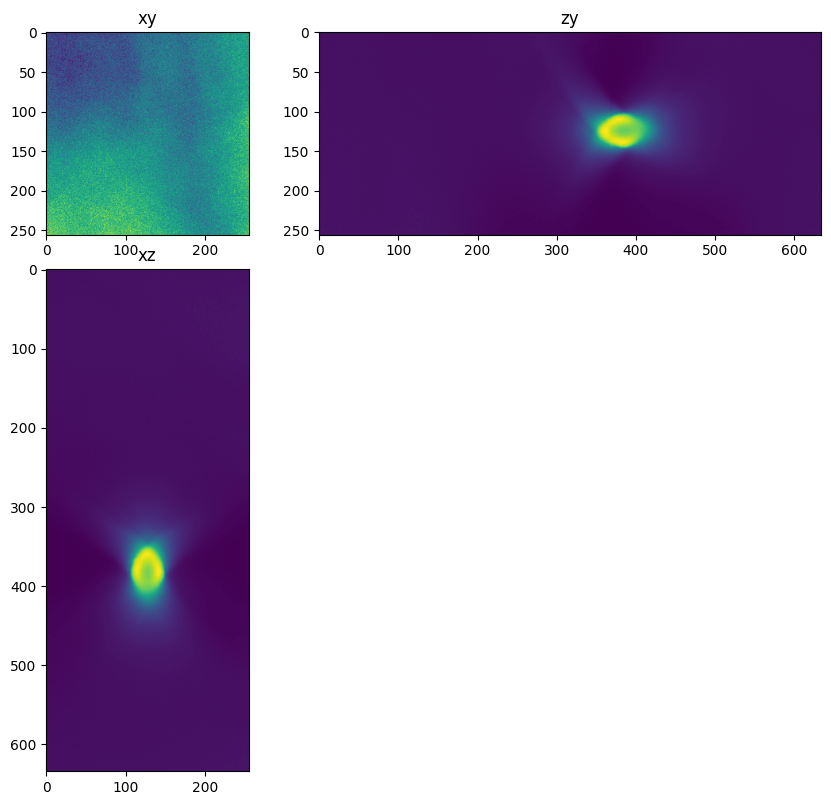

In [9]:
from tnia.plotting.projections import show_xyz_max, show_xyz_slice, show_xyz_slice_center
fig=show_xyz_slice(bead,128,128,50, sz=z_spacing/xy_spacing)

In [10]:
from clij2fft.richardson_lucy import richardson_lucy_nc
regularization_factor=0.0002
im_decon = richardson_lucy_nc(bead, psf, 500, regularization_factor)

get lib


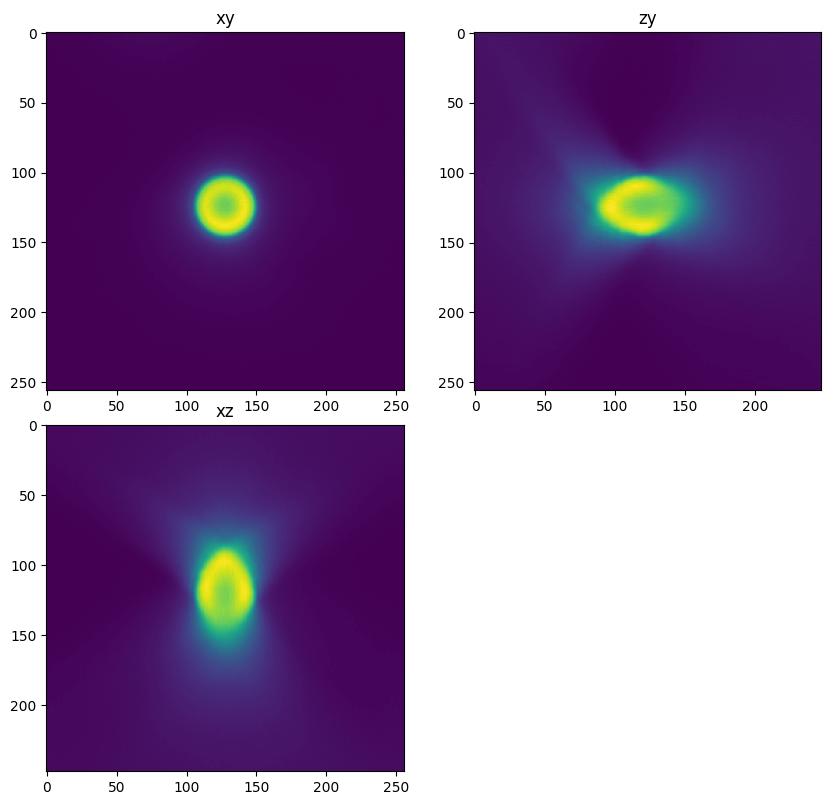

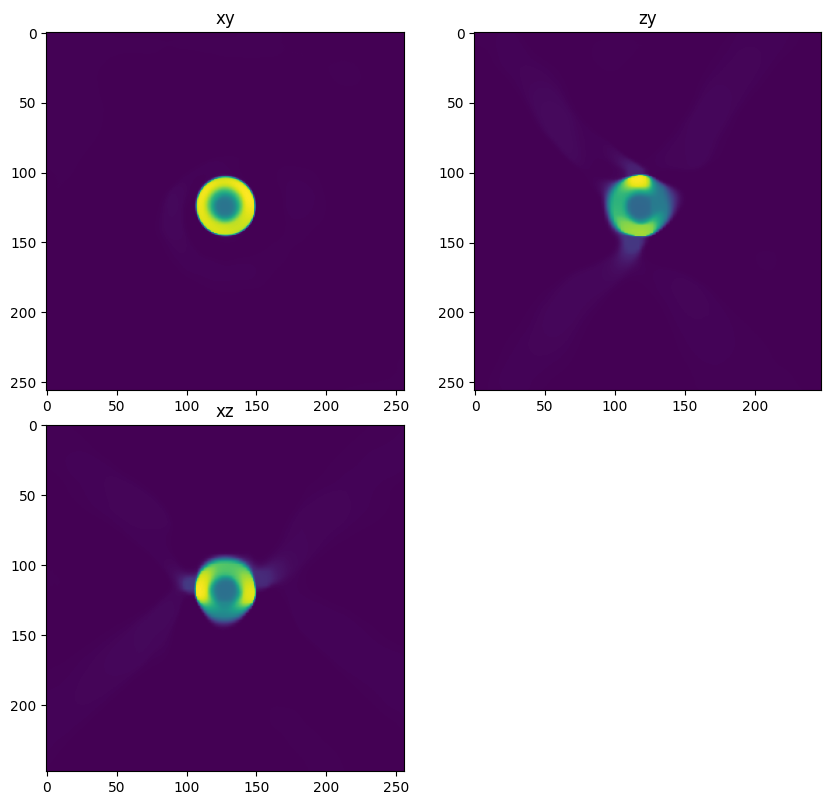

In [142]:
fig=show_xyz_slice(bead,128,128,50, sz=z_spacing/xy_spacing)
fig=show_xyz_slice(im_decon,128,128,50, sz=z_spacing/xy_spacing)


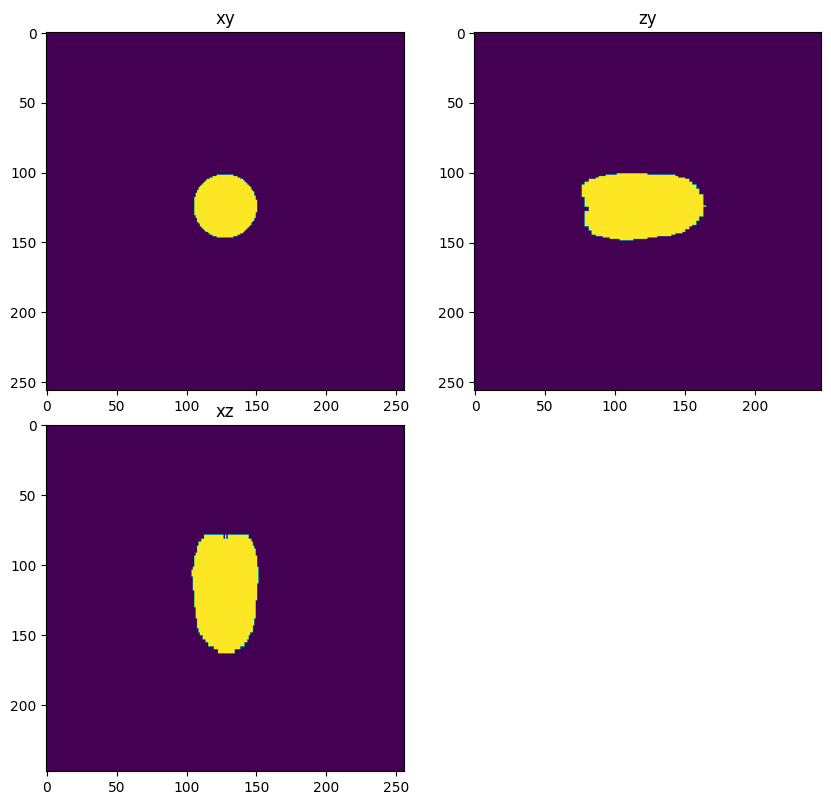

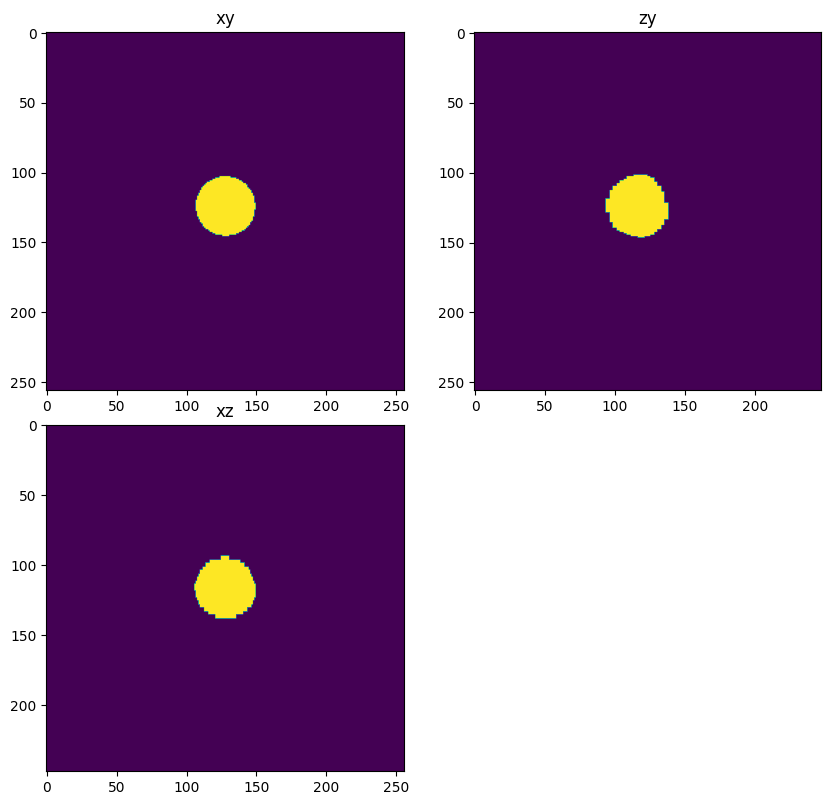

In [136]:
from skimage.filters import threshold_otsu
bead_thresholded=bead>threshold_otsu(bead)
decon_thresholded=im_decon>threshold_otsu(im_decon)

fig=show_xyz_slice(bead_thresholded,128,128,50, sz=z_spacing/xy_spacing)
fig=show_xyz_slice(decon_thresholded,128,128,50, sz=z_spacing/xy_spacing)

In [11]:
import napari
viewer=napari.Viewer()

viewer.add_image(bead, scale=(z_spacing/xy_spacing,1,1))
viewer.add_image(im_decon, scale=(z_spacing/xy_spacing,1,1))

<Image layer 'im_decon' at 0x202659683a0>

In [137]:
from skimage.measure import label
bead_labeled=label(bead_thresholded)
decon_labeled=label(decon_thresholded)



In [138]:
from skimage.measure import regionprops

bead_objects=regionprops(bead_labeled)

for o in bead_objects:
    print((o.bbox[3]-o.bbox[0])*z_spacing)
    print((o.bbox[4]-o.bbox[1])*xy_spacing)
    print((o.bbox[5]-o.bbox[2])*xy_spacing)
    
decon_objects=regionprops(decon_labeled)

for o in decon_objects:
    print((o.bbox[3]-o.bbox[0])*z_spacing)
    print((o.bbox[4]-o.bbox[1])*xy_spacing)
    print((o.bbox[5]-o.bbox[2])*xy_spacing)
    

5.76
3.096
3.1605
2.88
2.9025
2.838
